In [90]:
import matplotlib as mpl
from matplotlib import pyplot as plt
path = '/Library/Fonts/AdobeHeitiStd-Regular.otf'
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
plt.plot([1, 2], [1, 2])
plt.title('測試')
%matplotlib inline

## Basic stats

In [95]:
import pandas as pd
df = pd.read_csv('openrice_total.csv')

In [96]:
len(df)

29090

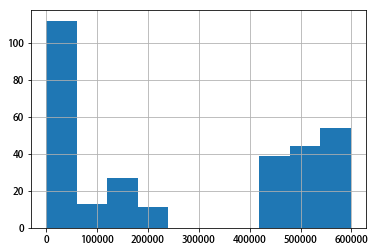

In [64]:
df.sample(300)['POI_ID'].hist()

In [65]:
sample = df.sample(300)

In [66]:
#sample['POI_ID'].ix[20585]

In [100]:
def poi_to_int(x):
    try:
        return int(x)
    except:
        return -1
        
sample['poi'] = sample['POI_ID'].apply(poi_to_int)

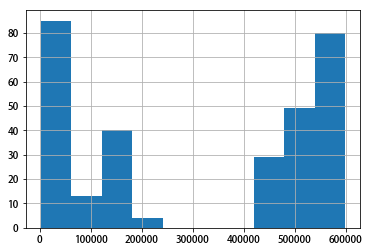

In [101]:
sample['poi'].hist()

## drop duplicates

In [102]:
len(df)

29090

In [105]:
df['poi'] = df['POI_ID'].apply(poi_to_int)

/Users/hupili/Desktop/project/open-rice-data/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
df = df.drop_duplicates(subset='poi')

In [108]:
len(df)

24510

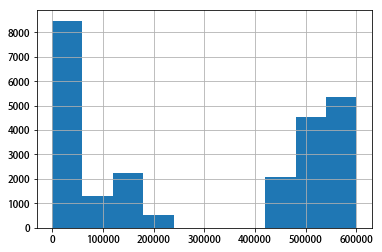

In [109]:
df['poi'].hist()

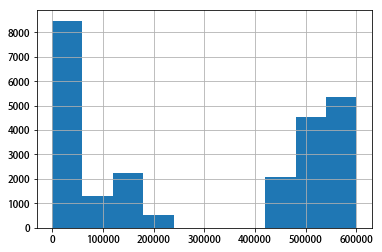

In [110]:
df[df['poi'] != -1]['poi'].hist()

In [111]:
df[df['poi'] > 500000]['style'].value_counts()

粉麵/米線                597
茶餐廳/冰室               514
小食店                  417
麵包店                  405
火鍋                   354
壽司/刺身                353
台式飲品                 345
甜品/糖水                343
港式                   304
點心                   235
中菜館                  205
咖啡店                  205
海鮮                   204
拉麵                   183
快餐店                  171
酒                    154
西式                   139
薄餅                   132
西式糕點                 116
燒臘                   113
三文治                  110
酒吧                   110
多國菜                  110
泰國菜                  110
漢堡包                  108
素食                   105
涼茶/龜苓膏                97
日本菜                   92
沙律                    90
All Day Breakfast     85
                    ... 
適合大夥人                  3
葡國菜                    3
地中海菜                   3
客家菜                    3
黔菜 (貴州)                3
蠔吧                     3
江浙菜                    2
盆菜                     2
卡拉OK                   2


In [112]:
df[
    (df['poi'] > 100000)
    &
    (df['poi'] < 300000)
]['style'].value_counts()

麵包店         388
粉麵/米線       285
茶餐廳/冰室      160
壽司/刺身       156
火鍋          155
甜品/糖水       146
海鮮          139
點心          100
小食店          99
拉麵           97
酒            85
薄餅           84
快餐店          81
酒吧           74
中菜館          61
咖啡店          61
港式           60
西餐廳          59
咖喱           54
涼茶/龜苓膏       45
沙律           44
雲吞/餃子        43
燒臘           42
素食           41
台式飲品         40
無肉餐單         38
西式           37
漢堡包          34
烤肉           34
粵菜 (廣東)      33
           ... 
蛇羹            2
西班牙菜          2
中東菜           2
地中海菜          2
湘菜 (湖南)       2
東北菜           1
廚師發辦          1
荷蘭菜           1
燒烤場           1
韓燒            1
浪漫情調          1
黔菜 (貴州)       1
社企餐廳          1
茶館            1
蒙古菜           1
印尼菜           1
唐餅            1
同客食飯          1
埃及菜           1
網店/食品分銷       1
蠔吧            1
希臘菜           1
爐端燒           1
京菜 (官府菜)      1
家庭親子          1
黎巴嫩菜          1
露天茶座          1
葡國菜           1
海鮮酒家          1
農家菜           1
Name: style, Length: 122

In [113]:
df['country'].value_counts()

港式          8125
西式          2672
粵菜 (廣東)     2659
日本菜         2657
多國菜         1229
台灣菜          905
美國菜          817
意大利菜         747
泰國菜          696
法國菜          405
川菜 (四川)      400
韓國菜          393
車仔麵          373
滬菜 (上海)      339
越南菜          281
滇菜 (雲南)      278
潮州菜          236
新加坡菜         115
中菜館          114
印度菜          114
英國菜           91
京川滬           68
西班牙菜          64
中東菜           61
京菜 (官府菜)      43
客家菜           42
外賣店           39
墨西哥菜          39
澳洲菜           35
地中海菜          35
            ... 
順德菜            9
鲁菜 (山東)        9
新疆菜            8
農家菜            7
晉菜 (山西)        7
陝菜 (陝西)        7
荷蘭菜            6
愛爾蘭菜           6
俄國菜            6
阿根廷菜           6
古巴菜            5
瑞士菜            4
粉麵/米線          4
淮揚菜            3
秘魯菜            3
埃及菜            3
黔菜 (貴州)        3
黎巴嫩菜           3
酒店餐廳           3
素食             3
摩洛哥            2
斯里蘭卡菜          2
巴西菜            2
非洲菜            2
猶太菜            1
酒              1
海鮮             1
蒙古菜           

In [114]:
df_sichuan = (df[
    df['country'].apply(lambda x: '四川' in str(x))
    |
    df['style'].apply(lambda x: '川' in str(x))
    # 京川滬
])

In [115]:
len(df_sichuan)

543

In [116]:
df_sichuan.sort_values(by='poi')

,title,link,POI_ID,like,location,price,country,style,review,bookmark,discount,poi
10735,駿景軒 Golden Valley (已搬遷),www.openrice.com/zh/hongkong/r-%E9%A7%BF%E6%99...,1028,24.0,跑馬地宏德街1A號英皇駿景酒店1樓,$201-400,粵菜 (廣東),川菜 (四川),(39 食評),1808,NaN,1028
11043,南北樓 The Red Pepper Restaurant,www.openrice.com/zh/hongkong/r-%E5%8D%97%E5%8C...,3690,11.0,銅鑼灣蘭芳道7號地下,$101-200,川菜 (四川),京川滬,(25 食評),932,NaN,3690
18745,詠藜園四川菜館 Wing Lai Yuen Sze Chuen Noodles Restau...,www.openrice.com/zh/hongkong/r-%E8%A9%A0%E8%97...,4014,212.0,黃大仙鳳德道15-17號地下,$51-100,川菜 (四川),滬菜 (上海),(319 食評),5299,惠顧滿港幣200元可獲小食乙客,4014
22854,龍江川粵菜館 Lung Kong Restaurant,www.openrice.com/zh/hongkong/r-%E9%BE%8D%E6%B1...,6958,11.0,南丫島榕樹灣大街38號地下,$101-200,粵菜 (廣東),川菜 (四川),(17 食評),75,NaN,6958
17051,詠藜園 Wing Lai Yuen,www.openrice.com/zh/hongkong/r-%E8%A9%A0%E8%97...,7773,158.0,紅磡黃埔新天地美食坊(第8期)1樓102-103及105號舖,$101-200,川菜 (四川),拉麵,(363 食評),4082,NaN,7773
9238,四川菜大平伙 SiChuan Da Ping Huo (裝修中),www.openrice.com/zh/hongkong/r-%E5%9B%9B%E5%B7...,8604,33.0,中環蘇豪荷李活道49號鴻豐商業中心地下低層,$201-400,川菜 (四川),海鮮,(54 食評),2844,NaN,8604
11958,小辣椒 Little Chilli,www.openrice.com/zh/hongkong/r-%E5%B0%8F%E8%BE...,10468,87.0,北角北角道33號,$101-200,川菜 (四川),水煮菜式,(177 食評),2334,NaN,10468
17189,景霖正宗四川麻辣米線 Chinese Noodle Restaurant (已搬遷),www.openrice.com/zh/hongkong/r-%E6%99%AF%E9%9C...,10488,59.0,紅磡民泰街17-27號黃埔新村永華樓地下6A號舖,$50以下,川菜 (四川),粉麵/米線,(93 食評),106,NaN,10488
14967,景霖正宗四川麻辣米線 Chinese Noodle Restaurant,www.openrice.com/zh/hongkong/r-%E6%99%AF%E9%9C...,10561,121.0,佐敦白加士街17號伯嘉士大廈地下,$50以下,川菜 (四川),粉麵/米線,(219 食評),1160,NaN,10561
6249,謙記火鍋 Him Kee Hot Pot,www.openrice.com/zh/hongkong/r-%E8%AC%99%E8%A8...,10794,72.0,銅鑼灣謝斐道408-412號華斐商業大廈1-3樓,$201-400,川菜 (四川),火鍋,(111 食評),3898,NaN,10794


In [149]:
df.sort_values(by='poi', ascending=False)[:10]

,title,link,POI_ID,like,location,price,country,style,review,bookmark,discount,poi
27344,美臨小廚,www.openrice.com/zh/hongkong/r-%E7%BE%8E%E8%87...,599902,NaN,屯門石排頭路7號德雅工業中心地下,$51-100,粵菜 (廣東),中菜館,NaN,1,NaN,599902
27553,辻利茶舖,www.openrice.com/zh/hongkong/r-%E8%BE%BB%E5%88...,599783,NaN,屯門屯隆街3號屯門市廣場1期3樓Kiosk 2,$51-100,日本菜,甜品/糖水,NaN,3,NaN,599783
29009,意八餐廳 Itamomo,www.openrice.com/zh/hongkong/r-%E6%84%8F%E5%85...,599636,NaN,天水圍天瑞路71-77號天澤商場1樓1045D號舖,$51-100,意大利菜,意大利菜,NaN,2,NaN,599636
28819,巧手製作 Crafted,www.openrice.com/zh/hongkong/r-%E5%B7%A7%E6%89...,599573,NaN,天水圍天華路30號T Town South1樓S117A號舖,$50以下,港式,點心,NaN,2,NaN,599573
28861,臨記車仔麵 Good Take Cart Noodles (裝修中),www.openrice.com/zh/hongkong/r-%E8%87%A8%E8%A8...,599405,NaN,天水圍天澤邨天澤商場1樓113A號舖,$50以下,車仔麵,港式,NaN,0,NaN,599405
29063,新美樂食堂,www.openrice.com/zh/hongkong/r-%E6%96%B0%E7%BE...,599237,1.0,流浮山鳳降村路口,$201-400,港式,港式,(1 食評),4,NaN,599237
27334,清玉 Kingyo,www.openrice.com/zh/hongkong/r-%E6%B8%85%E7%8E...,599088,NaN,屯門湖翠路1號蝴蝶廣場地下R130號舖,$50以下,台灣菜,台式飲品,NaN,2,NaN,599088
27345,LC-Tea,www.openrice.com/zh/hongkong/r-lc-tea-%E5%B1%A...,598981,NaN,屯門湖翠路168-236號海趣坊1樓22-23號舖,$50以下,台灣菜,台式飲品,NaN,4,NaN,598981
28447,阿叔泰麵 ASOK Thai Noodles,www.openrice.com/zh/hongkong/r-%E9%98%BF%E5%8F...,598848,1.0,元朗西菁街20號益輝大廈地下3號舖,$51-100,泰國菜,粉麵/米線,(2 食評),94,NaN,598848
27346,煲得起雞煲點心,www.openrice.com/zh/hongkong/r-%E7%85%B2%E5%BE...,598799,NaN,屯門湖翠路2號美樂花園商場地下84號舖,$101-200,粵菜 (廣東),火鍋,NaN,5,NaN,598799


In [118]:
df['bookmark'].max()

52621

In [119]:
len(df)

24510

In [120]:
df.sort_values(by='bookmark', ascending=False)[:10]

,title,link,POI_ID,like,location,price,country,style,review,bookmark,discount,poi
13926,The Place,www.openrice.com/zh/hongkong/r-the-place-%E6%9...,12121,240.0,旺角上海街555號香港康得思酒店L樓層,$401-800,多國菜,海鮮,(483 食評),52621,送 25里數 / 30積分,12121
16405,LAB EAT Restaurant & Bar,www.openrice.com/zh/hongkong/r-lab-eat-restaur...,452499,437.0,尖沙咀金巴利道87-89號僑豐大厦地下1-2號舖,$201-400,西式,海鮮,(567 食評),51051,正價75折 單點餐牌,452499
15895,極尚大喜屋日本料理 Deluxe Daikiya Japanese Restaurant,www.openrice.com/zh/hongkong/r-%E6%A5%B5%E5%B0...,166138,391.0,尖沙咀加連威老道2-6號愛賓商業大廈後座1樓102號舖,$201-400,日本菜,日式放題,(515 食評),49211,特選時段 85 折優惠！該優惠不得與其他優惠共用，適用於晚市19：30前離座及21：15後入...,166138
5825,勝香園 Sing Heung Yuen,www.openrice.com/zh/hongkong/r-%E5%8B%9D%E9%A6...,10577,950.0,中環美輪街2號排檔,$50以下,港式,茶餐廳/冰室,(1340 食評),43180,最優秀中西區/港式餐廳開飯熱店,10577
13138,鮮入圍煮 Market Hotpot,www.openrice.com/zh/hongkong/r-%E9%AE%AE%E5%85...,175710,218.0,旺角登打士街43H號登打士廣場2樓,$201-400,粵菜 (廣東),火鍋,(303 食評),42494,送 25里數 / 30積分,175710
16409,Espuma,www.openrice.com/zh/hongkong/r-espuma-%E5%B0%9...,175038,610.0,尖沙咀厚福街8號H8 2樓,$101-200,西班牙菜,甜品/糖水,(949 食評),40662,送 25里數 / 30積分,175038
16425,雅苑座 The Greenery,www.openrice.com/zh/hongkong/r-%E9%9B%85%E8%8B...,3666,520.0,尖沙咀麼地道69號帝苑酒店3樓,$401-800,西式,自助餐,(791 食評),40225,NaN,3666
20081,澳洲牛奶公司 Australia Dairy Company,www.openrice.com/zh/hongkong/r-%E6%BE%B3%E6%B4...,90,1609.0,佐敦白加士街47-49號地下,$50以下,港式,甜品/糖水,(2658 食評),40209,最優秀港式餐廳開飯熱店,90
7615,Burgeroom,www.openrice.com/zh/hongkong/r-burgeroom-%E9%8...,189507,822.0,銅鑼灣Fashion Walk食街百德新街50-56號地下D舖,$51-100,美國菜,漢堡包,(1027 食評),39827,最優秀灣仔/銅鑼灣/西式餐廳開飯熱店,189507
13681,Sky726,www.openrice.com/zh/hongkong/r-sky726-%E6%97%B...,449547,372.0,旺角彌敦道724-726號25樓,$201-400,法國菜,甜品/糖水,(499 食評),38856,自選餐牌主菜買一送一優惠 或 甜品8折優惠； 飲品一律8折,449547


In [121]:
df[df['poi'] < 100]

,title,link,POI_ID,like,location,price,country,style,review,bookmark,discount,poi
6920,阿里朗韓國餐廳 Arirang Korean Restaurant (已搬遷),www.openrice.com/zh/hongkong/r-%E9%98%BF%E9%87...,76,34.0,銅鑼灣勿地臣街1號時代廣場食通天1105室,$101-200,韓國菜,燒烤,(54 食評),101,NaN,76
7412,雅谷餐廳 Amigo,www.openrice.com/zh/hongkong/r-%E9%9B%85%E8%B0...,63,207.0,跑馬地黃泥涌道79A雅谷大廈地下,$801以上,法國菜,酒,(288 食評),9731,NaN,63
9728,Al's Diner,www.openrice.com/zh/hongkong/r-als-diner-%E4%B...,59,2.0,中環蘭桂坊德己立街27-30號地舖,$101-200,美國菜,酒吧,(7 食評),82,NaN,59
10303,喜萬年酒樓 Asiania Restaurant (已搬遷),www.openrice.com/zh/hongkong/r-%E5%96%9C%E8%90...,85,36.0,灣仔軒尼詩道1號熙信樓1樓,$51-100,粵菜 (廣東),海鮮,(73 食評),230,NaN,85
13543,味千拉麵 Ajisen Ramen (已搬遷),www.openrice.com/zh/hongkong/r-%E5%91%B3%E5%8D...,36,29.0,旺角彌敦道558號譽發大廈B舖,$51-100,日本菜,拉麵,(61 食評),73,NaN,36
15267,亞龍咖喱 Ah Long Pakistan Halal Food (已搬遷),www.openrice.com/zh/hongkong/r-%E4%BA%9E%E9%BE...,19,61.0,佐敦吳松街95B號地下,$50以下,中東菜,咖喱,(105 食評),146,NaN,19
16055,味一番 Aji Ichiban,www.openrice.com/zh/hongkong/r-%E5%91%B3%E4%B8...,30,52.0,尖沙咀山林道22-28號,$201-400,日本菜,壽司/刺身,(73 食評),2338,送 25里數 / 30積分,30
16218,阿里朗韓國餐廳 Arirang Korean Restaurant (已搬遷),www.openrice.com/zh/hongkong/r-%E9%98%BF%E9%87...,77,19.0,尖沙咀廣東道3-27號海港城海運大廈地下OT607號舖,$101-200,韓國菜,韓國菜,(43 食評),163,NaN,77
17883,味王日本料理 Ajiou Japanese Restaurant,www.openrice.com/zh/hongkong/r-%E5%91%B3%E7%8E...,33,8.0,土瓜灣土瓜灣道 285 號地下,$50以下,日本菜,拉麵,(17 食評),41,NaN,33
18096,Amaroni's,www.openrice.com/zh/hongkong/r-amaronis-%E4%B9...,61,430.0,九龍塘達之路80號又一城LG1層32號舖,$201-400,意大利菜,薄餅,(834 食評),12970,送 25里數 / 30積分,61


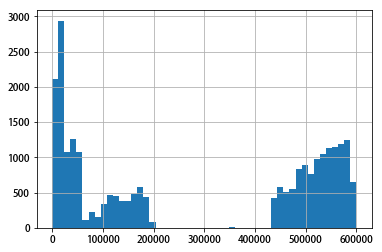

In [122]:
df['poi'].hist(bins=50)

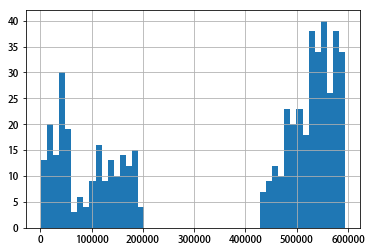

In [123]:
df_sichuan['poi'].hist(bins=50)

In [124]:
cum_ratio = pd.Series(index=range(400000, 600000, 5000))
for i in range(400000, 600000, 5000):
    cum_ratio[i] = len(df_sichuan[df_sichuan['poi'] < i]) / len(df[df['poi'] < i])

Text(0.5, 1.0, '川菜 ratio v.s. POI')

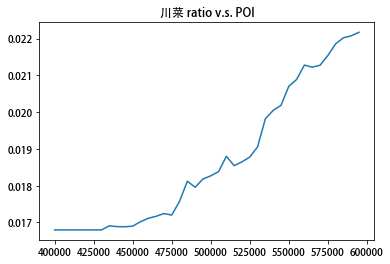

In [125]:
cum_ratio.plot()
plt.title('川菜 ratio v.s. POI')

Text(0.5, 1.0, '車仔麵')

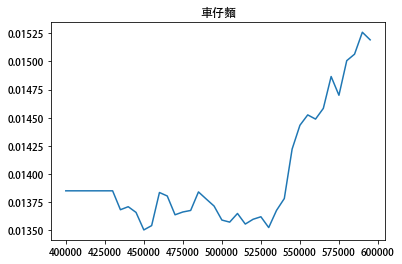

In [126]:
df_type = df[
    df['country'].apply(lambda x: '車仔麵' in str(x))
]
cum_ratio = pd.Series(index=range(400000, 600000, 5000))
for i in range(400000, 600000, 5000):
    cum_ratio[i] = len(df_type[df_type['poi'] < i]) / len(df[df['poi'] < i])
cum_ratio.plot()
plt.title('車仔麵')

港式
西式
粵菜 (廣東)
日本菜
多國菜
台灣菜
美國菜
意大利菜
泰國菜
法國菜
川菜 (四川)
韓國菜
車仔麵
滬菜 (上海)
越南菜
滇菜 (雲南)
潮州菜
新加坡菜
中菜館
印度菜


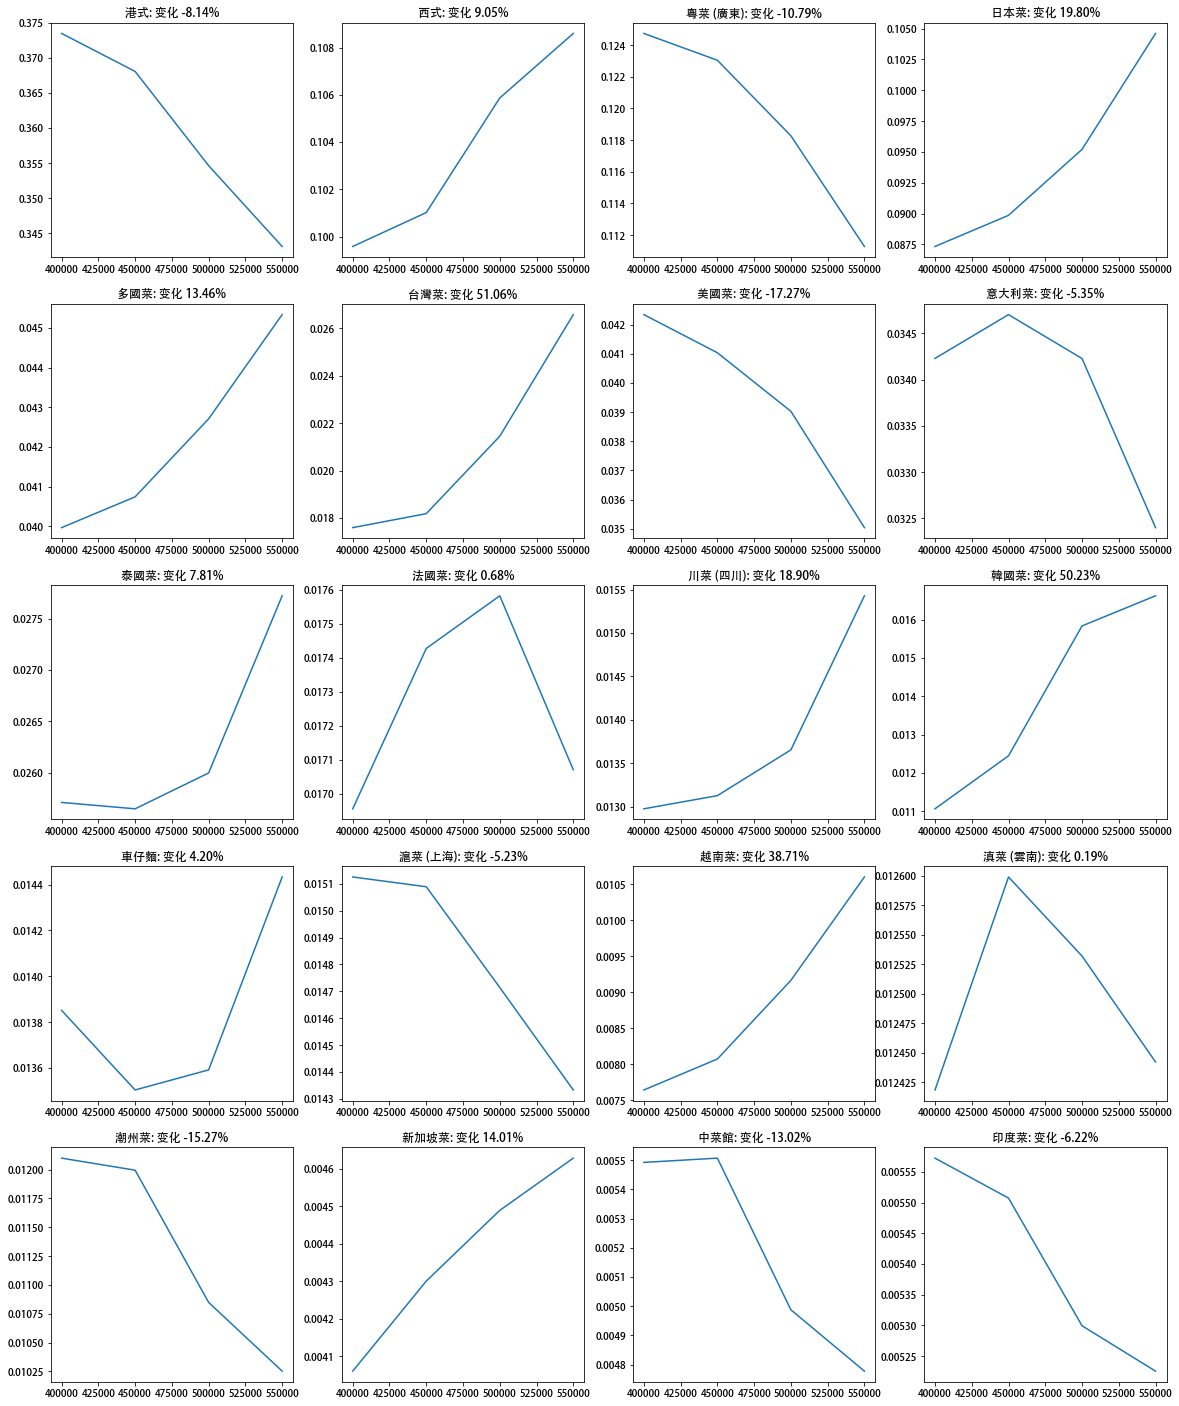

In [146]:
plt.figure(figsize=(20, 25))

def plot_one_type(name, i):
    plt.subplot(5, 4, i)
    df_type = df[
        df['country'].apply(lambda x: name in str(x))
    ]
    cum_ratio = pd.Series(index=range(400000, 600000, 50000))
    for i in range(400000, 600000, 50000):
        cum_ratio[i] = len(df_type[df_type['poi'] < i]) / len(df[df['poi'] < i])
    cum_ratio.plot()
    change = (cum_ratio.iloc[-1] - cum_ratio.iloc[0]) / cum_ratio.iloc[0] * 100
    plt.title('{name}: 变化 {change:.2f}%'.format(**locals()))
    return cum_ratio

df_cum_ratio = pd.DataFrame()
i = 1
for name, count in df['country'].value_counts()[:20].items():
    print(name)
    cum_ratio = plot_one_type(name, i)
    df_cum_ratio[name] = cum_ratio
    i += 1

港式
西式
粵菜 (廣東)
日本菜
多國菜
台灣菜
美國菜
意大利菜
泰國菜
法國菜
川菜 (四川)
韓國菜
車仔麵
滬菜 (上海)
越南菜
滇菜 (雲南)
潮州菜
新加坡菜
中菜館
印度菜


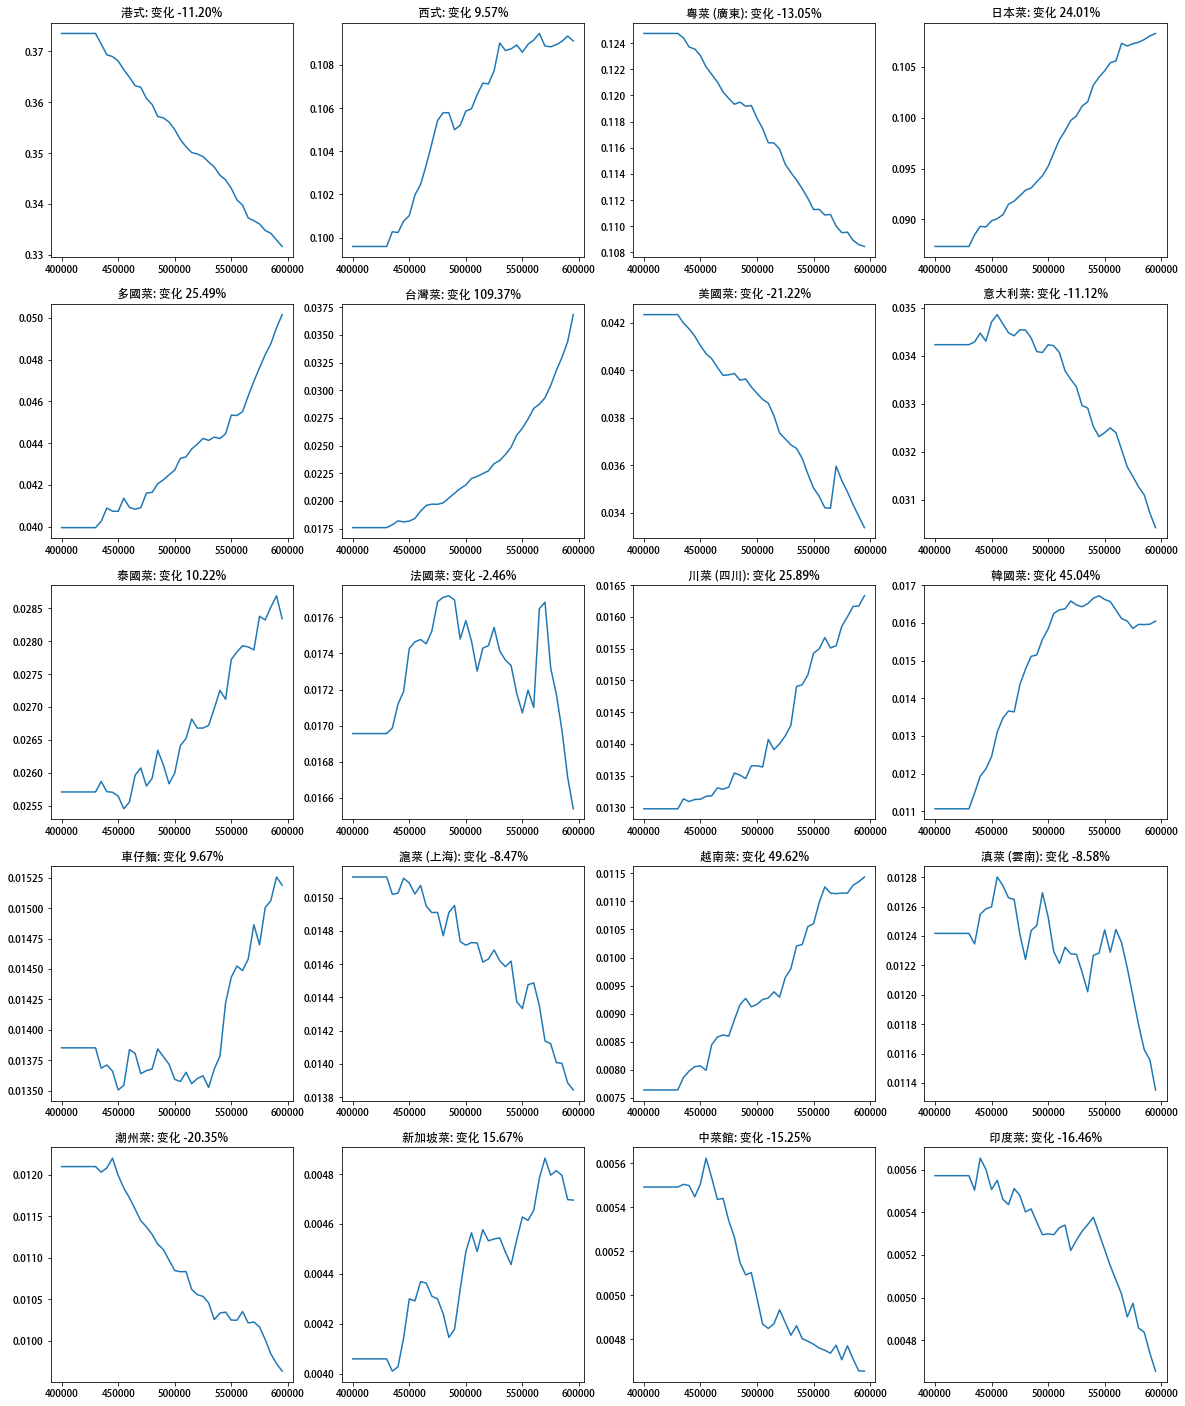

In [147]:
plt.figure(figsize=(20, 25))

def plot_one_type(name, i):
    plt.subplot(5, 4, i)
    df_type = df[
        df['country'].apply(lambda x: name in str(x))
    ]
    cum_ratio = pd.Series(index=range(400000, 600000, 5000))
    for i in range(400000, 600000, 5000):
        cum_ratio[i] = len(df_type[df_type['poi'] < i]) / len(df[df['poi'] < i])
    cum_ratio.plot()
    change = (cum_ratio.iloc[-1] - cum_ratio.iloc[0]) / cum_ratio.iloc[0] * 100
    plt.title('{name}: 变化 {change:.2f}%'.format(**locals()))
    return cum_ratio

df_cum_ratio = pd.DataFrame()
i = 1
for name, count in df['country'].value_counts()[:20].items():
    print(name)
    cum_ratio = plot_one_type(name, i)
    df_cum_ratio[name] = cum_ratio
    i += 1

In [128]:
df_cum_ratio

,港式,西式,粵菜 (廣東),日本菜,多國菜,台灣菜,美國菜,意大利菜,泰國菜,法國菜,川菜 (四川),韓國菜,車仔麵,滬菜 (上海),越南菜,滇菜 (雲南),潮州菜,新加坡菜,中菜館,印度菜
400000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
405000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
410000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
415000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
420000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
425000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
430000,0.373507,0.099586,0.124741,0.087327,0.039962,0.017593,0.042350,0.034230,0.025712,0.016956,0.012976,0.011065,0.013851,0.015125,0.007642,0.012418,0.012100,0.004060,0.005493,0.005572
435000,0.371422,0.100267,0.124410,0.088471,0.040264,0.017852,0.041994,0.034288,0.025873,0.016986,0.013133,0.011482,0.013684,0.015020,0.007864,0.012347,0.012032,0.004011,0.005505,0.005505
440000,0.369326,0.100232,0.123703,0.089311,0.040899,0.018203,0.041751,0.034469,0.025716,0.017119,0.013091,0.011929,0.013710,0.015027,0.007978,0.012548,0.012084,0.004028,0.005500,0.005655
445000,0.368966,0.100760,0.123552,0.089249,0.040749,0.018111,0.041440,0.034303,0.025708,0.017190,0.013123,0.012125,0.013660,0.015118,0.008058,0.012585,0.012202,0.004144,0.005449,0.005602


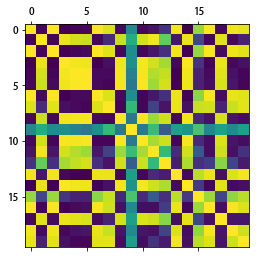

In [129]:
plt.matshow(df_cum_ratio.corr())

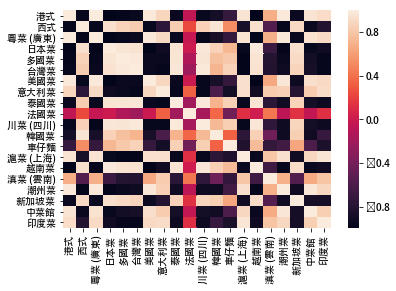

In [130]:
import seaborn as sns
corr = df_cum_ratio.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


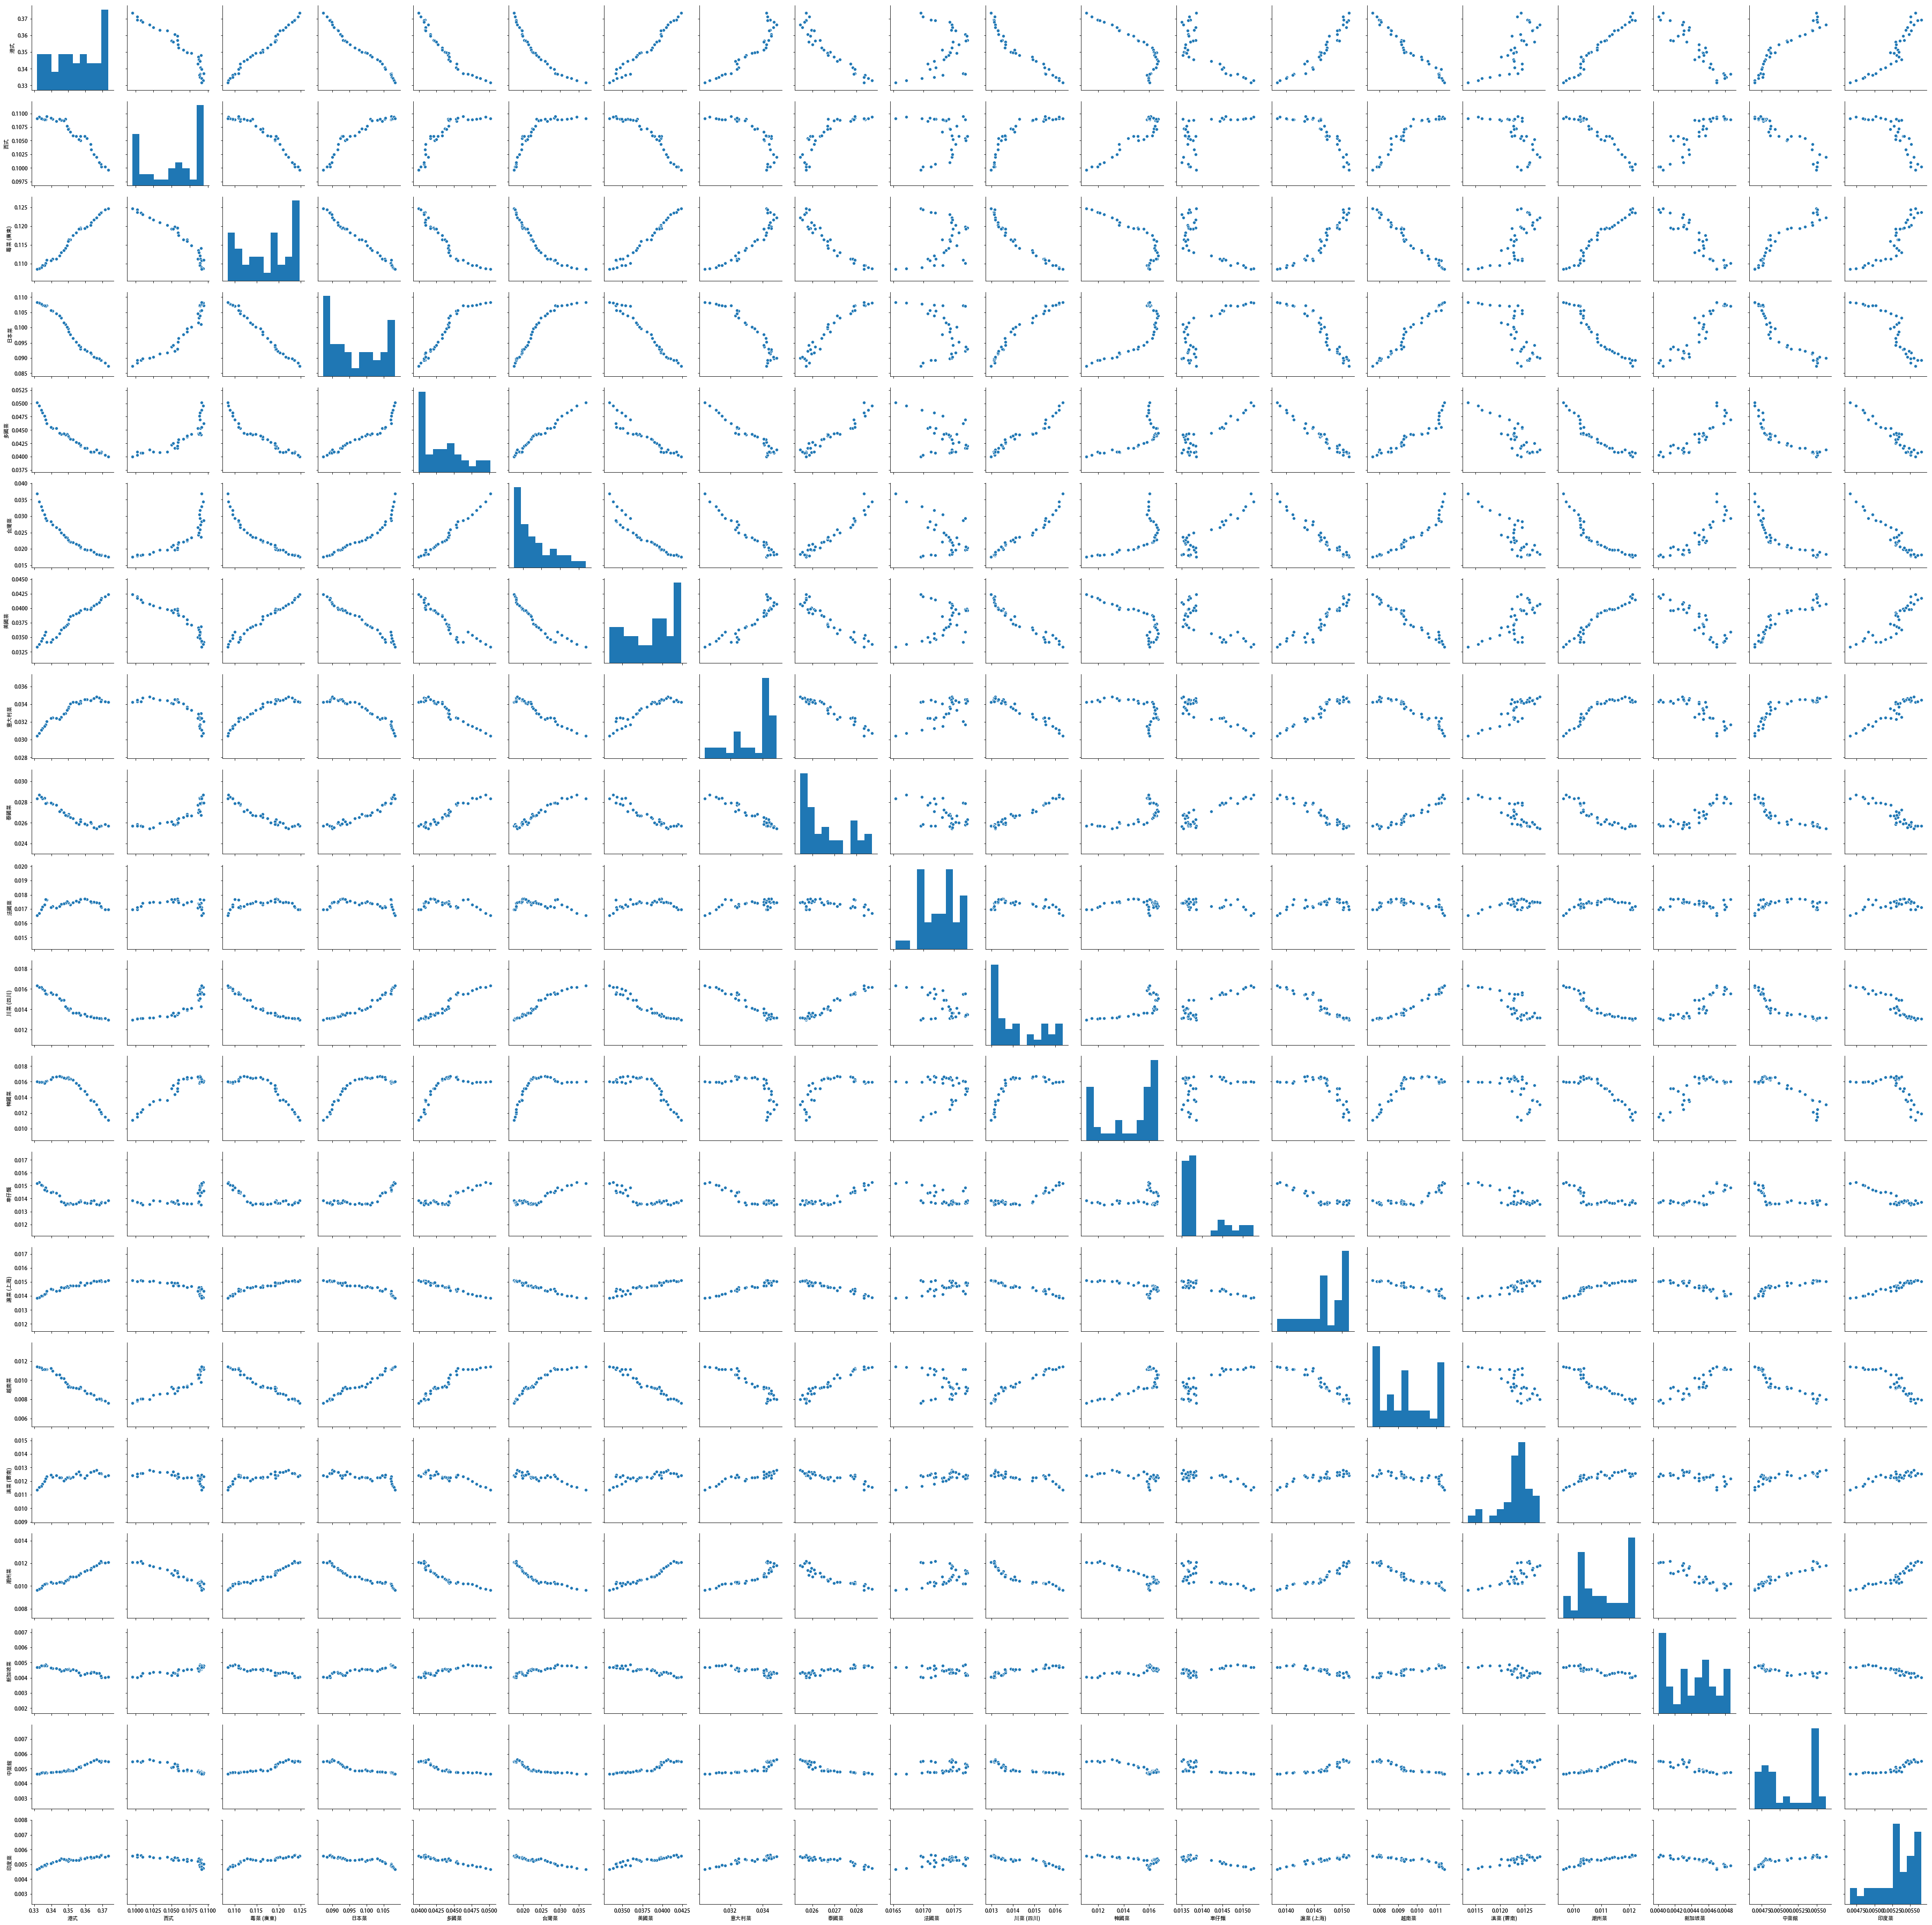

In [131]:
sns.pairplot(df_cum_ratio)

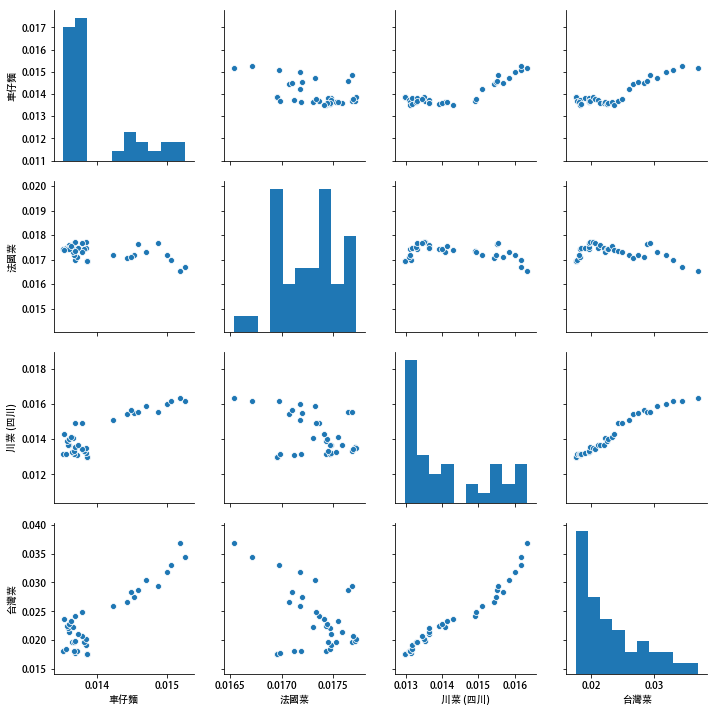

In [132]:
sns.pairplot(df_cum_ratio[['車仔麵', '法國菜', '川菜 (四川)', '台灣菜']])

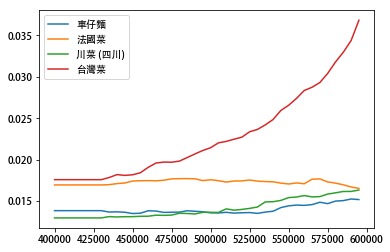

In [133]:
df_cum_ratio[['車仔麵', '法國菜', '川菜 (四川)', '台灣菜']].plot()

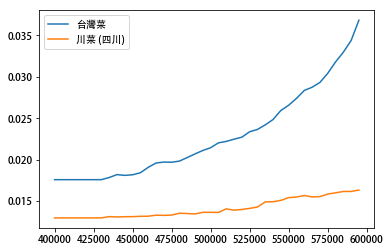

In [150]:
df_cum_ratio[['台灣菜', '川菜 (四川)']].plot()

In [135]:
df_cum_ratio.corr()

,港式,西式,粵菜 (廣東),日本菜,多國菜,台灣菜,美國菜,意大利菜,泰國菜,法國菜,川菜 (四川),韓國菜,車仔麵,滬菜 (上海),越南菜,滇菜 (雲南),潮州菜,新加坡菜,中菜館,印度菜
港式,1.000000,-0.960063,0.994434,-0.990860,-0.967713,-0.949939,0.984559,0.885960,-0.941746,-0.058628,-0.955855,-0.890133,-0.714393,0.958294,-0.989291,0.686899,0.984941,-0.945212,0.956469,0.928144
西式,-0.960063,1.000000,-0.958536,0.945415,0.870714,0.840041,-0.950375,-0.758437,0.840925,0.242392,0.865327,0.964374,0.525874,-0.868121,0.943195,-0.568726,-0.972251,0.902286,-0.944725,-0.812570
粵菜 (廣東),0.994434,-0.958536,1.000000,-0.996230,-0.961861,-0.949387,0.990261,0.901080,-0.950605,-0.023822,-0.967963,-0.877054,-0.721831,0.956544,-0.990847,0.689687,0.982229,-0.940318,0.951862,0.911232
日本菜,-0.990860,0.945415,-0.996230,1.000000,0.961054,0.948903,-0.989362,-0.911947,0.957736,0.000900,0.971934,0.861611,0.727395,-0.954089,0.988515,-0.685764,-0.974482,0.940336,-0.953672,-0.908916
多國菜,-0.967713,0.870714,-0.961861,0.961054,1.000000,0.990228,-0.949169,-0.946850,0.961941,-0.128542,0.968121,0.769222,0.818755,-0.985765,0.954809,-0.803302,-0.942754,0.907197,-0.902233,-0.971027
台灣菜,-0.949939,0.840041,-0.949387,0.948903,0.990228,1.000000,-0.943777,-0.967417,0.970802,-0.202894,0.978403,0.717368,0.870371,-0.981467,0.951869,-0.809525,-0.920226,0.882194,-0.874389,-0.972477
美國菜,0.984559,-0.950375,0.990261,-0.989362,-0.949169,-0.943777,1.000000,0.890887,-0.942694,0.001107,-0.963678,-0.868905,-0.715846,0.938103,-0.986391,0.655914,0.972206,-0.926591,0.936792,0.899928
意大利菜,0.885960,-0.758437,0.901080,-0.911947,-0.946850,-0.967417,0.890887,1.000000,-0.963727,0.333339,-0.963874,-0.605496,-0.892662,0.945221,-0.902700,0.829805,0.859172,-0.805219,0.829591,0.916657
泰國菜,-0.941746,0.840925,-0.950605,0.957736,0.961941,0.970802,-0.942694,-0.963727,1.000000,-0.195968,0.983927,0.709701,0.857186,-0.955291,0.954815,-0.770863,-0.909117,0.873002,-0.889060,-0.926825
法國菜,-0.058628,0.242392,-0.023822,0.000900,-0.128542,-0.202894,0.001107,0.333339,-0.195968,1.000000,-0.175037,0.361147,-0.424049,0.131540,0.023599,0.437733,-0.060812,0.136103,-0.042204,0.128017


## Hierachical clustering

Refs:

* https://thelonenutblog.wordpress.com/2017/03/30/correlation-matrix-clustering/

/Users/hupili/Desktop/project/open-rice-data/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if sys.path[0] == '':


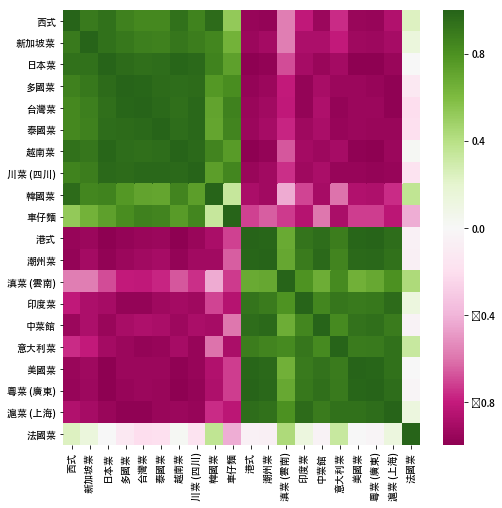

In [136]:
import scipy
import scipy.cluster.hierarchy as sch
import numpy as np

df_cum_ratio

X = df_cum_ratio.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df_cum_ratio.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_cum_ratio = df_cum_ratio.reindex_axis(columns, axis=1)

plt.figure(figsize=(8, 8))
# plt.matshow(df.corr())
corr = df_cum_ratio.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

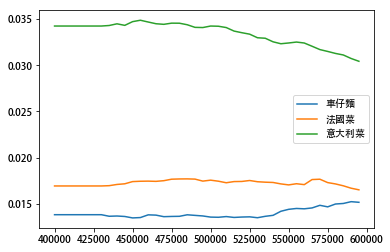

In [137]:
df_cum_ratio[['車仔麵', '法國菜', '意大利菜']].plot()

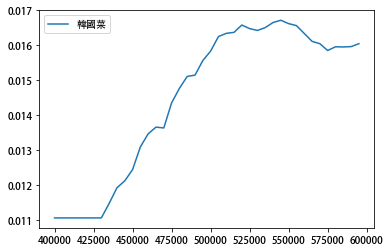

In [152]:
df_cum_ratio[['韓國菜']].plot()

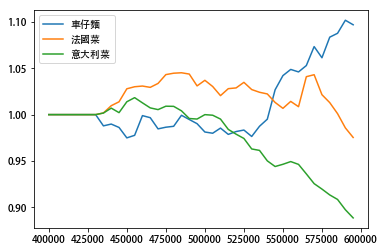

In [151]:
(df_cum_ratio / df_cum_ratio.iloc[0])[['車仔麵', '法國菜', '意大利菜']].plot()

(390250.0, 604750.0, 0.0, 0.017930600553073783)

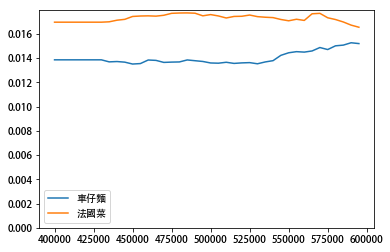

In [157]:
(df_cum_ratio)[['車仔麵', '法國菜']].plot()
#print(plt.axis())
plt.axis((390250.0, 604750.0, 0.0, 0.017930600553073783))

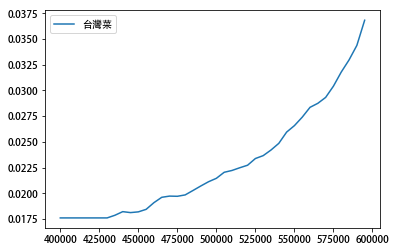

In [139]:
df_cum_ratio[['台灣菜']].plot()

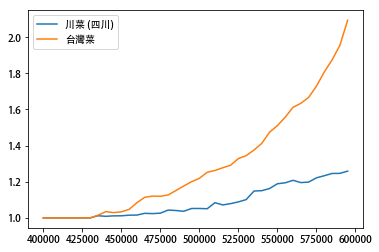

In [140]:
(df_cum_ratio / df_cum_ratio.iloc[0])[['川菜 (四川)', '台灣菜']].plot()

In [162]:
df['price'].value_counts()

$50以下       12272
$51-100      5376
$101-200     4393
$201-400     1810
$401-800      490
$801以上        161
Name: price, dtype: int64

In [163]:
def price_to_number(p):
    return {
        '$50以下': 25,
        '$51-100': 75,
        '$101-200': 150,
        '$201-400': 300,
        '$401-800': 600,
        '$801以上': 1000
    }.get(p, np.NaN)
df['nprice'] = df['price'].apply(price_to_number)

In [203]:
def percent25(x):
    return x.quantile(0.25)

def percent75(x):
    return x.quantile(0.75)

df_price = df[['country', 'nprice']].groupby('country').aggregate(['count', 'mean', percent25, 'median', percent75])

In [204]:
df_price.columns = ['count', 'mean', 'p25', 'median', 'p75']
#sort_values(by=('nprice', 'mean'))

In [205]:
len(df_price)

76

In [206]:
df_price[df_price['count'] > 100].sort_values(by='mean', ascending=False)

,count,mean,p25,median,p75
country,,,,,
法國菜,405,250.617284,75.0,150.0,300.0
意大利菜,747,175.568942,75.0,150.0,150.0
多國菜,1229,167.982099,75.0,150.0,150.0
日本菜,2657,162.815205,75.0,75.0,150.0
中菜館,114,147.149123,75.0,150.0,150.0
粵菜 (廣東),2659,128.112072,25.0,75.0,150.0
韓國菜,393,124.363868,75.0,150.0,150.0
西式,2671,111.606140,25.0,75.0,150.0
川菜 (四川),400,102.375000,25.0,75.0,150.0
